<Axes: xlabel='fam', ylabel='f1_train'>

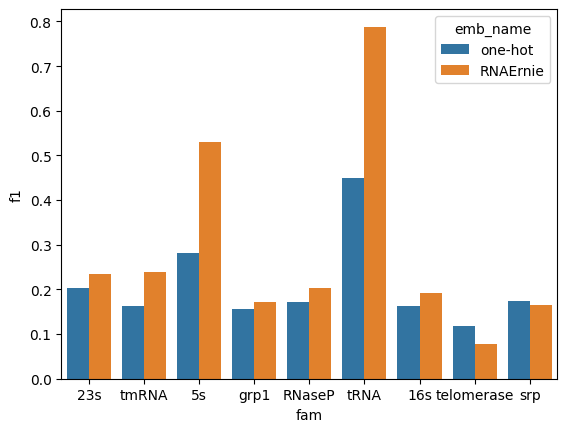

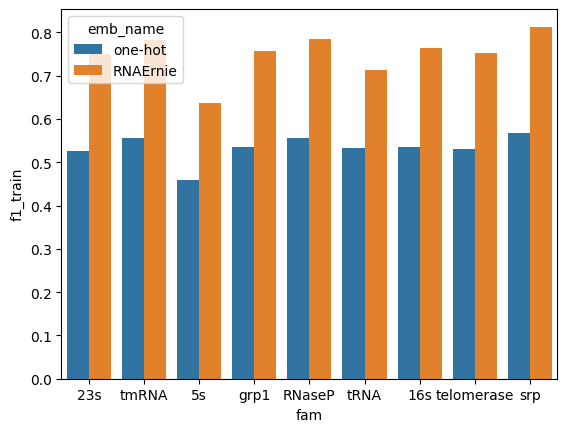

In [10]:
import pandas as pd 
import os 

# famfold
res_path = "../../insync/lncRNA/LLM-RNA/results/"
summary = []
for res in os.listdir(res_path):
    if "results_" in res:
        emb_name = res.split("_")[1]
        path = os.path.join(res_path, res)
        for fam in os.listdir(path):
            try: 
                df = pd.read_csv(os.path.join(path, fam, "metrics.csv"))
            except FileNotFoundError:
                continue
            f1, f1_shift, f1_post = df["test_f1"].iloc[-1], df["test_f1_shift"].iloc[-1], df["test_f1_post_rinalmo"].iloc[-1]
            f1_train = df["train_f1"].iloc[-1]
            summary.append([res, fam, emb_name, f1_train, f1, f1_shift, f1_post])

summary = pd.DataFrame(summary, columns=["res", "fam", "emb_name", "f1_train", "f1", "f1_shift", "f1_post"])

# boxplot
from matplotlib import pyplot as plt
import seaborn as sns
sns.barplot(data=summary, x="fam", y="f1", hue="emb_name")
plt.figure()
sns.barplot(data=summary, x="fam", y="f1_train", hue="emb_name")

In [4]:
!
pip install matplotlib seaborn

  Using cached matplotlib-3.9.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 2.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 2.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 3.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.0/306.0 kB 3.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 3.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 3.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 3.2 MB/s eta 0:00:00
